The file house_prices_training.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house. According to prev implementation the predicted price of a 1650 sq-ft, 3 br house (using gradient descent in octave):
 $293081.825679


In [112]:
import numpy as np
import tensorflow as tf

my_data = np.genfromtxt('data/house_prices_training.txt', delimiter=',')
x_train = my_data[:,:2]
y_train = my_data[:,2:].flatten()

In [113]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return ((dataset - mu)/sigma, mu, sigma)

In [137]:
ANY_NUMBER = None
NUMBER_OF_FEATURES = 3
LEARNING_RATE = 0.03
NUMBER_OF_EXAMPLES = len(x_train)

# Model parameters


W = tf.Variable(tf.zeros([NUMBER_OF_FEATURES,1]))

# Model input and output

x = tf.placeholder(tf.float32, [ANY_NUMBER, NUMBER_OF_FEATURES])
y = tf.placeholder(tf.float32, [ANY_NUMBER, 1])
linear_model = tf.matmul(x, W)

x_normalized, mu, sigma = feature_normalize(x_train)
x_2 = np.append(np.ones((NUMBER_OF_EXAMPLES,1)),x_normalized, axis=1)
y_2 = np.reshape(y_train,[NUMBER_OF_EXAMPLES,1])

# loss
loss = tf.reduce_mean(tf.square(linear_model - y_2))

train = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) 

for step in range(500):
  sess.run(train, {x:x_2, y:y_2})

# evaluate training accuracy
print("loss:",sess.run(loss, {x:x_2,y:y_2}))  

area = (1650 - mu[0]) /sigma[0]
rooms = (3 - mu[1])/sigma[1]
print("prediction:",sess.run(linear_model, feed_dict={x: [[1, area, rooms]]}))



loss: 4.08656e+09
prediction: [[ 293081.28125]]


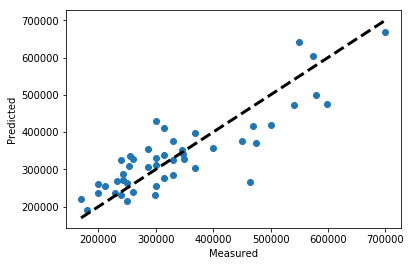

In [60]:
import matplotlib.pyplot as plt

pred_y = sess.run(linear_model, feed_dict={x: x_2})

fig, ax = plt.subplots()
ax.scatter(y_2, pred_y)
ax.plot([y_2.min(), y_2.max()], [y_2.min(), y_2.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [173]:
# With the high level API
features = [tf.contrib.layers.real_valued_column("area", dimension=1),tf.contrib.layers.real_valued_column("rooms", dimension=1)]
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)
input_fn = tf.contrib.learn.io.numpy_input_fn({"area":x_2[:,1:2].flatten(), "rooms":x_2[:,2:].flatten()}, y_train)

estimator = estimator.fit(input_fn=input_fn, steps=500)
# train_loss = estimator.evaluate(input_fn=input_fn)
# print("train loss: %r"% train_loss)
results = estimator.evaluate(input_fn=input_fn, steps=1)
print("results: ",results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_environment': 'local', '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd749073ac8>, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_task_type': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_model_dir': '/tmp/tmpl428ha_8', '_task_id': 0, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_num_worker_replicas': 0}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create

In [174]:
input_fn_2 = tf.contrib.learn.io.numpy_input_fn({"area":np.array([area]), "rooms":np.array([rooms])})

predictor = estimator.predict(
    input_fn=input_fn_2
)

for item in predictor:
    print(item)

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /tmp/tmpl428ha_8/model.ckpt-1
0.0655726
